## Observations and Insights 

In [100]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [23]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [24]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [28]:
# Combine the data into a single dataset
# Combine using outer join using common column "Mouse ID"
# Display the data table for preview
merged_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")
merged_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [32]:
# Checking the number of mice.
unique_mice = merged_data["Mouse ID"].value_counts()
unique_mice

# There are 249 mice in total

g989    13
a262    10
b559    10
h246    10
p438    10
        ..
x226     1
f932     1
n482     1
h428     1
l872     1
Name: Mouse ID, Length: 249, dtype: int64

In [79]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_ids = merged_data.loc[merged_data.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_ids

array(['g989'], dtype=object)

In [81]:
duplicate_ids = merged_data.loc[merged_data.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_ids

array(['g989'], dtype=object)

In [83]:
# Identify number of mice in both in both ID and Timepoint
duplicate_data = merged_data.loc[merged_data["Mouse ID"] == "g989"]
duplicate_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [84]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data.describe()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,13.0,13.0,13.000000,13.000000,13.000000
mean,21.0,26.0,14.615385,52.341020,0.538462
std,0.0,0.0,11.079549,5.243412,0.660225
min,21.0,26.0,0.000000,45.000000,0.000000
25%,21.0,26.0,5.000000,48.786801,0.000000
50%,21.0,26.0,15.000000,51.745156,0.000000
75%,21.0,26.0,20.000000,55.326122,1.000000
max,21.0,26.0,35.000000,62.570880,2.000000


In [85]:
# Create new clean dataframe
clean_mice_data = merged_data[merged_data["Mouse ID"].isin(duplicate_ids) == False]  
clean_mice_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [86]:
# Checking the number of mice in the clean DataFrame.
clean_mice_data.value_counts("Mouse ID")

Mouse ID
z969    10
i177    10
l509    10
l471    10
k894    10
        ..
l872     1
x336     1
f932     1
x226     1
b447     1
Length: 248, dtype: int64

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



In [68]:
# Identify all unique drugs in the dataframe
drug_list = mouse_metadata["Drug Regimen"].unique()
drug_list

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [88]:
# Create new dataset using clean dataset with rows "mouse id", "drug regimen", "tumor volume (mm3)"
mean_tumor_volume = clean_mice_data.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
mean_tumor_volume


Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [90]:
median_tumor_volume = clean_mice_data.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
median_tumor_volume

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [92]:
variance_tumor_volume = clean_mice_data.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
variance_tumor_volume

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [93]:
std_tumor_volume = clean_mice_data.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
std_tumor_volume

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.622085
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [94]:
sem_tumor_volume = clean_mice_data.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
sem_tumor_volume

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [99]:
summary_table = pd.DataFrame({"Mean": mean_tumor_volume,
                              "Median": median_tumor_volume,
                              "Variance": variance_tumor_volume,
                              "STD": std_tumor_volume,
                              "SEM": sem_tumor_volume
                             })
summary_table

,Mean,Median,Variance,STD,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [ ]:
# Using the aggregation method, produce the same summary statistics in a single line

aggregate_method = 
# Need to assign a number to each thing in the dictionary  


In [130]:
clean_mice_data.value_counts("Drug Regimen")

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
dtype: int64

## Bar and Pie Charts

In [149]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot (pandas below).
# Set x-axis and tick locations
drug_regimens = ["230", "228","188", "186", "182", "181", "181", "178", "178", "148"]
drugs = ["Capomulin", "Ramicane","Ketapril", "Naftisol", "Zoniferol", "Stelasyn", "Placebo", "Infubinol", "Ceftamin", "Propriva"]
x_axis = np.arange(len(drug_regimens))


<BarContainer object of 10 artists>

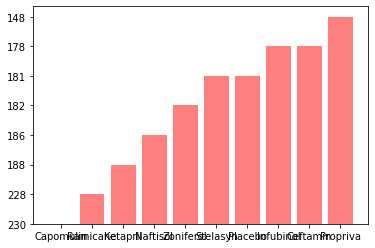

(-0.75, 9.75)

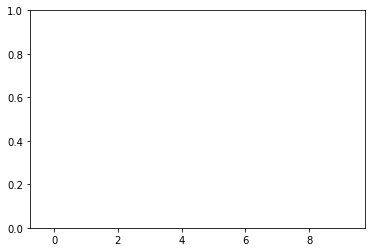

In [153]:
plt.xlim(-0.75, len(drug_regimens)-0.25)

(0.0, 300.0)

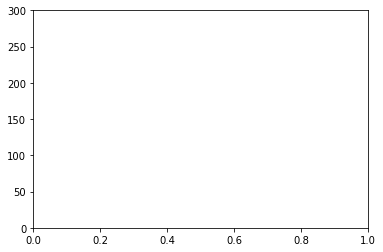

In [154]:
plt.ylim(0, 300)

<BarContainer object of 10 artists>

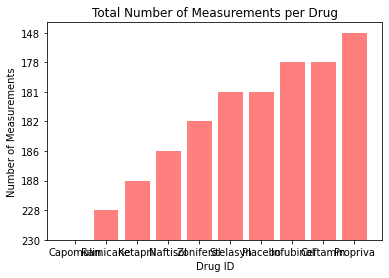

In [170]:
plt.title("Total Number of Measurements per Drug")
plt.xlabel("Drug ID")
plt.ylabel("Number of Measurements")

plt.bar(drugs, drug_regimens, color='r', alpha=0.5, align="center")

In [ ]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas
# Turn this data into a dataframe

drug_regimens = ["230", "228","188", "186", "182", "181", "181", "178", "178", "148"]
drugs = ["Capomulin", "Ramicane","Ketapril", "Naftisol", "Zoniferol", "Stelasyn", "Placebo", "Infubinol", "Ceftamin", "Propriva"]
x_axis = np.arange(len(drug_regimens))

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pandas


In [188]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Identify number of males vs. females
clean_mice_data.value_counts("Sex")

Sex
Male      958
Female    922
dtype: int64

In [184]:
# Insert pie table with corresponding data
labels = ["Males", "Females"]

sizes = [958, 922]

colors = ["red", "blue"]


([<matplotlib.patches.Wedge at 0x7f92bd395ca0>,
 [Text(-0.03308201408261547, 1.0995024239828841, 'Males'),
  Text(0.033082014082615095, -1.0995024239828841, 'Females')])

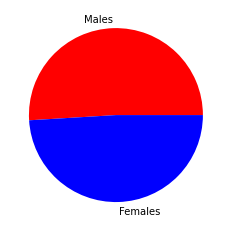

In [185]:
plt.pie(sizes, labels=labels, colors=colors)

## Quartiles, Outliers and Boxplots

In [204]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
mouse_tumor_volume = clean_mice_data.groupby(["Mouse ID"]).head()
mouse_tumor_volume

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1883,z969,Naftisol,Male,9,30,0,45.000000,0
1884,z969,Naftisol,Male,9,30,5,49.332999,0
1885,z969,Naftisol,Male,9,30,10,52.656081,1
1886,z969,Naftisol,Male,9,30,15,54.713005,2


In [212]:
tum_vol_capomulin = mouse_tumor_volume.loc[mouse_tumor_volume["Drug Regimen"] == "Capomulin", :]
tum_vol_capomulin

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
435,i557,Capomulin,Female,1,24,20,43.967895,0
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [213]:
tum_vol_ramicane = mouse_tumor_volume.loc[mouse_tumor_volume["Drug Regimen"] == "Ramicane", :]
tum_vol_ramicane

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
449,w678,Ramicane,Female,5,24,5,43.166373,0
450,y449,Ramicane,Male,19,24,0,45.000000,0
451,y449,Ramicane,Male,19,24,5,45.877545,0
452,y449,Ramicane,Male,19,24,10,46.378092,0


In [214]:
tum_vol_infubinol = mouse_tumor_volume.loc[mouse_tumor_volume["Drug Regimen"] == "Infubinol", :]
tum_vol_infubinol

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
454,a203,Infubinol,Female,20,23,0,45.000000,0
455,a203,Infubinol,Female,20,23,5,48.508468,0
456,a203,Infubinol,Female,20,23,10,51.852437,1
457,a203,Infubinol,Female,20,23,15,52.777870,1
458,a203,Infubinol,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...,...
1863,z581,Infubinol,Female,24,25,0,45.000000,0
1864,z581,Infubinol,Female,24,25,5,49.273092,1
1865,z581,Infubinol,Female,24,25,10,50.478750,2
1866,z581,Infubinol,Female,24,25,15,51.196304,2


In [216]:
tum_vol_ceftamin = mouse_tumor_volume.loc[mouse_tumor_volume["Drug Regimen"] == "Ceftamin", :]
tum_vol_ceftamin

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
484,a275,Ceftamin,Female,20,28,0,45.000000,0
485,a275,Ceftamin,Female,20,28,5,46.795257,0
486,a275,Ceftamin,Female,20,28,10,47.371343,0
487,a275,Ceftamin,Female,20,28,15,49.734404,0
488,a275,Ceftamin,Female,20,28,20,50.513437,1
...,...,...,...,...,...,...,...,...
1846,y865,Ceftamin,Male,23,26,0,45.000000,0
1847,y865,Ceftamin,Male,23,26,5,46.735006,1
1848,y865,Ceftamin,Male,23,26,10,49.522740,1
1849,y865,Ceftamin,Male,23,26,15,50.806519,1


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
